In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
uber = pd.read_csv('Uber Request Data.csv')
uber

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp
0,619,Airport,1.0,Trip Completed,11/7/2016 11:51,11/7/2016 13:00
1,867,Airport,1.0,Trip Completed,11/7/2016 17:57,11/7/2016 18:47
2,1807,City,1.0,Trip Completed,12/7/2016 9:17,12/7/2016 9:58
3,2532,Airport,1.0,Trip Completed,12/7/2016 21:08,12/7/2016 22:03
4,3112,City,1.0,Trip Completed,13-07-2016 08:33:16,13-07-2016 09:25:47
...,...,...,...,...,...,...
6740,6745,City,NaN,No Cars Available,15-07-2016 23:49:03,NaN
6741,6752,Airport,NaN,No Cars Available,15-07-2016 23:50:05,NaN
6742,6751,City,NaN,No Cars Available,15-07-2016 23:52:06,NaN
6743,6754,City,NaN,No Cars Available,15-07-2016 23:54:39,NaN


In [3]:
uber.shape

(6745, 6)

In [4]:
# check the dataset columns and datatypes
uber.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6745 entries, 0 to 6744
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Request id         6745 non-null   int64  
 1   Pickup point       6745 non-null   object 
 2   Driver id          4095 non-null   float64
 3   Status             6745 non-null   object 
 4   Request timestamp  6745 non-null   object 
 5   Drop timestamp     2831 non-null   object 
dtypes: float64(1), int64(1), object(4)
memory usage: 316.3+ KB


In [5]:
# check for summary statistics
uber.describe(include = 'all')

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp
count,6745.000000,6745,4095.000000,6745,6745,2831
unique,NaN,2,NaN,3,5618,2598
top,NaN,City,NaN,Trip Completed,11/7/2016 8:37,12/7/2016 6:22
freq,NaN,3507,NaN,2831,6,4
mean,3384.644922,NaN,149.501343,NaN,NaN,NaN
std,1955.099667,NaN,86.051994,NaN,NaN,NaN
min,1.000000,NaN,1.000000,NaN,NaN,NaN
25%,1691.000000,NaN,75.000000,NaN,NaN,NaN
50%,3387.000000,NaN,149.000000,NaN,NaN,NaN
75%,5080.000000,NaN,224.000000,NaN,NaN,NaN


In [6]:
uber.isnull().sum()

,0
Request id,0
Pickup point,0
Driver id,2650
Status,0
Request timestamp,0
Drop timestamp,3914


In [7]:
#check the status for which drop timestamp is not available
uber[uber['Drop timestamp'].isnull()]['Status'].value_counts()

,count
Status,
No Cars Available,2650
Cancelled,1264


In [8]:
#checking datatypes
uber.dtypes

,0
Request id,int64
Pickup point,object
Driver id,float64
Status,object
Request timestamp,object
Drop timestamp,object


In [9]:
uber['Request timestamp'] = pd.to_datetime(uber['Request timestamp'],  dayfirst=True,
    errors='coerce')
uber['Drop timestamp'] = pd.to_datetime(uber['Drop timestamp'],  dayfirst=True,
    errors='coerce')
uber

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp
0,619,Airport,1.0,Trip Completed,2016-07-11 11:51:00,2016-07-11 13:00:00
1,867,Airport,1.0,Trip Completed,2016-07-11 17:57:00,2016-07-11 18:47:00
2,1807,City,1.0,Trip Completed,2016-07-12 09:17:00,2016-07-12 09:58:00
3,2532,Airport,1.0,Trip Completed,2016-07-12 21:08:00,2016-07-12 22:03:00
4,3112,City,1.0,Trip Completed,NaT,NaT
...,...,...,...,...,...,...
6740,6745,City,NaN,No Cars Available,NaT,NaT
6741,6752,Airport,NaN,No Cars Available,NaT,NaT
6742,6751,City,NaN,No Cars Available,NaT,NaT
6743,6754,City,NaN,No Cars Available,NaT,NaT


In [10]:
uber.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6745 entries, 0 to 6744
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Request id         6745 non-null   int64         
 1   Pickup point       6745 non-null   object        
 2   Driver id          4095 non-null   float64       
 3   Status             6745 non-null   object        
 4   Request timestamp  2674 non-null   datetime64[ns]
 5   Drop timestamp     1150 non-null   datetime64[ns]
dtypes: datetime64[ns](2), float64(1), int64(1), object(2)
memory usage: 316.3+ KB


In [11]:
# Create dervied metrics which will be useful for later analysis
day_name_dic ={0:'Monday', 1:'Tuesday', 2:'Wednesday',3:'Thursday', 4:'Friday', 5:'Saturday', 6:'Sunday'}
uber['Request Date'] = uber['Request timestamp'].dt.date
uber['Request Hour'] = uber['Request timestamp'].dt.hour
uber['Request Day'] = uber['Request timestamp'].dt.dayofweek.map(day_name_dic)
uber

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp,Request Date,Request Hour,Request Day
0,619,Airport,1.0,Trip Completed,2016-07-11 11:51:00,2016-07-11 13:00:00,2016-07-11,11.0,Monday
1,867,Airport,1.0,Trip Completed,2016-07-11 17:57:00,2016-07-11 18:47:00,2016-07-11,17.0,Monday
2,1807,City,1.0,Trip Completed,2016-07-12 09:17:00,2016-07-12 09:58:00,2016-07-12,9.0,Tuesday
3,2532,Airport,1.0,Trip Completed,2016-07-12 21:08:00,2016-07-12 22:03:00,2016-07-12,21.0,Tuesday
4,3112,City,1.0,Trip Completed,NaT,NaT,NaT,NaN,NaN
...,...,...,...,...,...,...,...,...,...
6740,6745,City,NaN,No Cars Available,NaT,NaT,NaT,NaN,NaN
6741,6752,Airport,NaN,No Cars Available,NaT,NaT,NaT,NaN,NaN
6742,6751,City,NaN,No Cars Available,NaT,NaT,NaT,NaN,NaN
6743,6754,City,NaN,No Cars Available,NaT,NaT,NaT,NaN,NaN


In [12]:
def get_time_slot(x):
  if x >=5 and x <=10:
    slot = 'Morning Peak Hour'
  elif x > 10 and x <= 14:
    slot = 'Noon'
  elif x >14 and x <= 17:
    slot = ' Afternoon'
  elif x > 17 and x <=21:
    slot= 'Evening Rush'
  elif x >21 and x <=23 or x == 0:
    slot = 'Night'
  else:
    slot = 'Midnight'
  return slot

In [13]:
uber['Time Slot'] = uber['Request Hour'].apply(get_time_slot)
uber

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp,Request Date,Request Hour,Request Day,Time Slot
0,619,Airport,1.0,Trip Completed,2016-07-11 11:51:00,2016-07-11 13:00:00,2016-07-11,11.0,Monday,Noon
1,867,Airport,1.0,Trip Completed,2016-07-11 17:57:00,2016-07-11 18:47:00,2016-07-11,17.0,Monday,Afternoon
2,1807,City,1.0,Trip Completed,2016-07-12 09:17:00,2016-07-12 09:58:00,2016-07-12,9.0,Tuesday,Morning Peak Hour
3,2532,Airport,1.0,Trip Completed,2016-07-12 21:08:00,2016-07-12 22:03:00,2016-07-12,21.0,Tuesday,Evening Rush
4,3112,City,1.0,Trip Completed,NaT,NaT,NaT,NaN,NaN,Midnight
...,...,...,...,...,...,...,...,...,...,...
6740,6745,City,NaN,No Cars Available,NaT,NaT,NaT,NaN,NaN,Midnight
6741,6752,Airport,NaN,No Cars Available,NaT,NaT,NaT,NaN,NaN,Midnight
6742,6751,City,NaN,No Cars Available,NaT,NaT,NaT,NaN,NaN,Midnight
6743,6754,City,NaN,No Cars Available,NaT,NaT,NaT,NaN,NaN,Midnight


### Data Analysis

In [14]:
# Identify the frequency of request status
status_freq = pd.DataFrame(uber.groupby('Status').size()).reset_index().rename(columns = {0:'Number of Requests'})
total_req = status_freq['Number of Requests'].sum()
status_freq['Percentage']=round((status_freq['Number of Requests']/total_req)*100, 2)

status_freq

,Status,Number of Requests,Percentage
0,Cancelled,1264,18.74
1,No Cars Available,2650,39.29
2,Trip Completed,2831,41.97


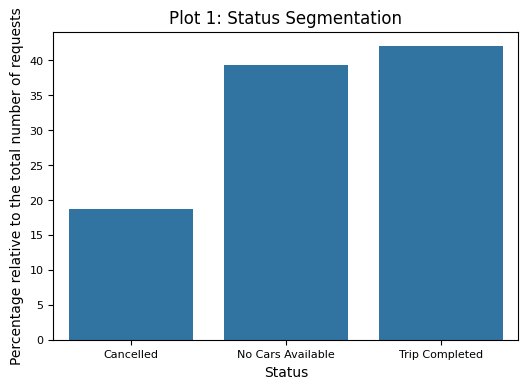

In [15]:
# Visualize the above observation
plt.figure(figsize = (6,4))
a = sns.barplot(data = status_freq, x = 'Status', y = 'Percentage')
a.set_title('Plot 1: Status Segmentation', fontsize = 12)
a.set_ylabel("Percentage relative to the total number of requests", fontsize = 10)
a.tick_params(labelsize = 8)
plt.show()

In [34]:
uber

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp,Request Date,Request Hour,Request Day,Time Slot
0,619,Airport,1.0,Trip Completed,2016-07-11 11:51:00,2016-07-11 13:00:00,2016-07-11,11.0,Monday,Noon
1,867,Airport,1.0,Trip Completed,2016-07-11 17:57:00,2016-07-11 18:47:00,2016-07-11,17.0,Monday,Afternoon
2,1807,City,1.0,Trip Completed,2016-07-12 09:17:00,2016-07-12 09:58:00,2016-07-12,9.0,Tuesday,Morning Peak Hour
3,2532,Airport,1.0,Trip Completed,2016-07-12 21:08:00,2016-07-12 22:03:00,2016-07-12,21.0,Tuesday,Evening Rush
4,3112,City,1.0,Trip Completed,NaT,NaT,NaT,NaN,NaN,Midnight
...,...,...,...,...,...,...,...,...,...,...
6740,6745,City,NaN,No Cars Available,NaT,NaT,NaT,NaN,NaN,Midnight
6741,6752,Airport,NaN,No Cars Available,NaT,NaT,NaT,NaN,NaN,Midnight
6742,6751,City,NaN,No Cars Available,NaT,NaT,NaT,NaN,NaN,Midnight
6743,6754,City,NaN,No Cars Available,NaT,NaT,NaT,NaN,NaN,Midnight


In [16]:
# check for top 10 drivers with most cancellation request
driver = pd.DataFrame(uber[uber['Status']=='Cancelled'].groupby('Driver id').size()).reset_index().rename(columns={0:'Number of Cancelled Requests'})
driver = driver.sort_values(by = 'Number of Cancelled Requests', ascending = False)
driver = driver.iloc[:10,]
driver

,Driver id,Number of Cancelled Requests
78,84.0,12
50,54.0,11
200,206.0,10
136,142.0,10
204,210.0,9
24,27.0,9
261,267.0,9
160,166.0,9
132,138.0,9
108,114.0,9


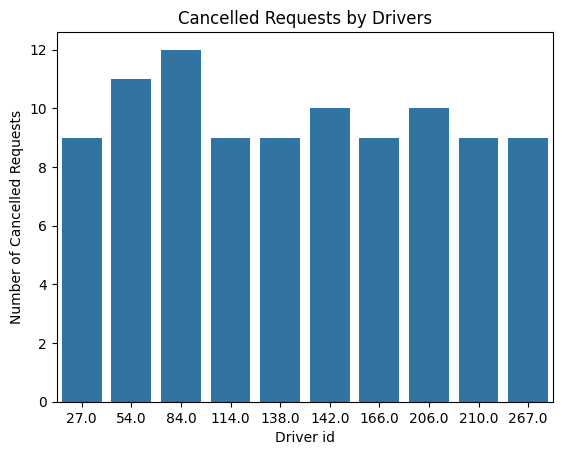

In [17]:
b = sns.barplot(data = driver, x='Driver id', y = 'Number of Cancelled Requests')
b.set_title("Cancelled Requests by Drivers")
plt.show()

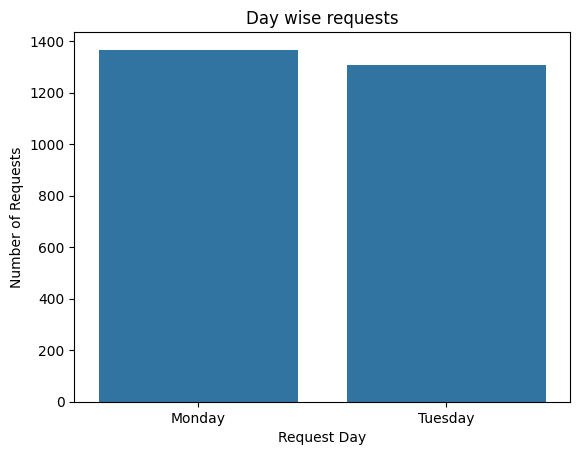

In [18]:
# day wise variation of requests
c = sns.countplot(data = uber, x = 'Request Day')
c.set_title('Day wise requests')
c.set_ylabel('Number of Requests')
plt.show()

In [19]:
uber['Request Day'].groupby(uber['Request Day']).value_counts()

,,count
Request Day,Request Day,
Monday,Monday,1367
Tuesday,Tuesday,1307


In [20]:
# Status based on Pick Up point
status_by_pickup = pd.DataFrame(uber.groupby(['Status', 'Pickup point']).size()).reset_index().rename(columns = {0:'Number of requests'})
status_by_pickup

,Status,Pickup point,Number of requests
0,Cancelled,Airport,198
1,Cancelled,City,1066
2,No Cars Available,Airport,1713
3,No Cars Available,City,937
4,Trip Completed,Airport,1327
5,Trip Completed,City,1504


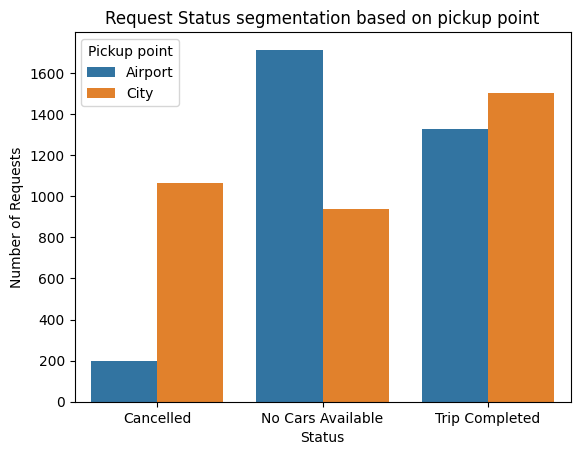

In [21]:
d = sns.barplot(data = status_by_pickup, x = 'Status', y = 'Number of requests', hue = 'Pickup point')
d.set_title('Request Status segmentation based on pickup point')
d.set_ylabel('Number of Requests')
plt.show()

In [22]:
# check for customer deniability with respect to pickup point
customer_den = uber[uber['Status'].isin(['Cancelled' ,'No Cars Available'])].groupby('Pickup point').size().reset_index().rename(columns = {0:'Number of requests Denied'})
customer_den

,Pickup point,Number of requests Denied
0,Airport,1911
1,City,2003


<function matplotlib.pyplot.show(close=None, block=None)>

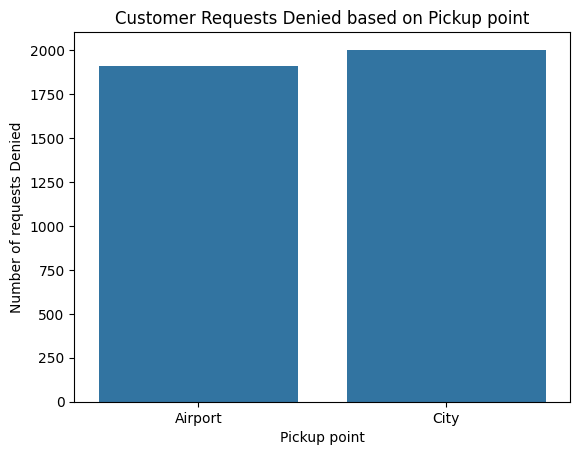

In [23]:
e = sns.barplot(data = customer_den, x = 'Pickup point', y = 'Number of requests Denied')
e.set_title("Customer Requests Denied based on Pickup point")
plt.show

In [24]:
# Status segmentation based on time slots
status_by_time = pd.DataFrame(uber.groupby(['Time Slot', 'Status']).size()).reset_index().rename(columns = {0: 'Number of Requests'})
status_by_time = status_by_time.sort_values(['Time Slot', 'Number of Requests'], ascending = [True,False])
status_by_time

,Time Slot,Status,Number of Requests
2,Afternoon,Trip Completed,148
1,Afternoon,No Cars Available,123
0,Afternoon,Cancelled,35
4,Evening Rush,No Cars Available,469
5,Evening Rush,Trip Completed,253
3,Evening Rush,Cancelled,57
8,Midnight,Trip Completed,1732
7,Midnight,No Cars Available,1728
6,Midnight,Cancelled,782
11,Morning Peak Hour,Trip Completed,403


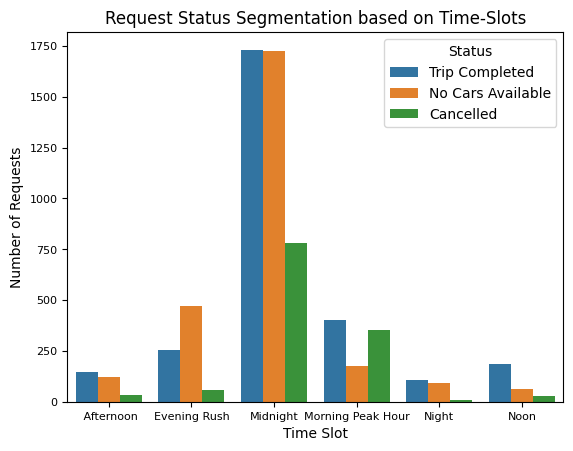

In [25]:
f = sns.barplot(data = status_by_time, x ='Time Slot', y = 'Number of Requests', hue ='Status')
f.set_title('Request Status Segmentation based on Time-Slots')
f.tick_params(labelsize = 8)
plt.show()

In [26]:
# Status segmentation based on time slots and pickup point
city_pickup = uber[uber['Pickup point'] == 'City']
airport_pickup = uber[uber['Pickup point'] == 'Airport']



In [27]:
uber_status_by_time_slot_city = pd.DataFrame(city_pickup.groupby(['Time Slot','Status']).size()).reset_index().rename(columns={0:'Number of Requests'})
uber_status_by_time_slot_city = uber_status_by_time_slot_city.sort_values(['Time Slot','Number of Requests'],ascending=[True,False])
uber_status_by_time_slot_city.head(6)

,Time Slot,Status,Number of Requests
2,Afternoon,Trip Completed,70
1,Afternoon,No Cars Available,25
0,Afternoon,Cancelled,15
5,Evening Rush,Trip Completed,131
4,Evening Rush,No Cars Available,21
3,Evening Rush,Cancelled,19


In [28]:
uber_status_by_time_slot_airport = pd.DataFrame(airport_pickup.groupby(['Time Slot','Status']).size()).reset_index().rename(columns={0:'Number of Requests'})
uber_status_by_time_slot_airport = uber_status_by_time_slot_airport.sort_values(['Time Slot','Number of Requests'],ascending=[True,False])
uber_status_by_time_slot_airport.head(6)

,Time Slot,Status,Number of Requests
1,Afternoon,No Cars Available,98
2,Afternoon,Trip Completed,78
0,Afternoon,Cancelled,20
4,Evening Rush,No Cars Available,448
5,Evening Rush,Trip Completed,122
3,Evening Rush,Cancelled,38


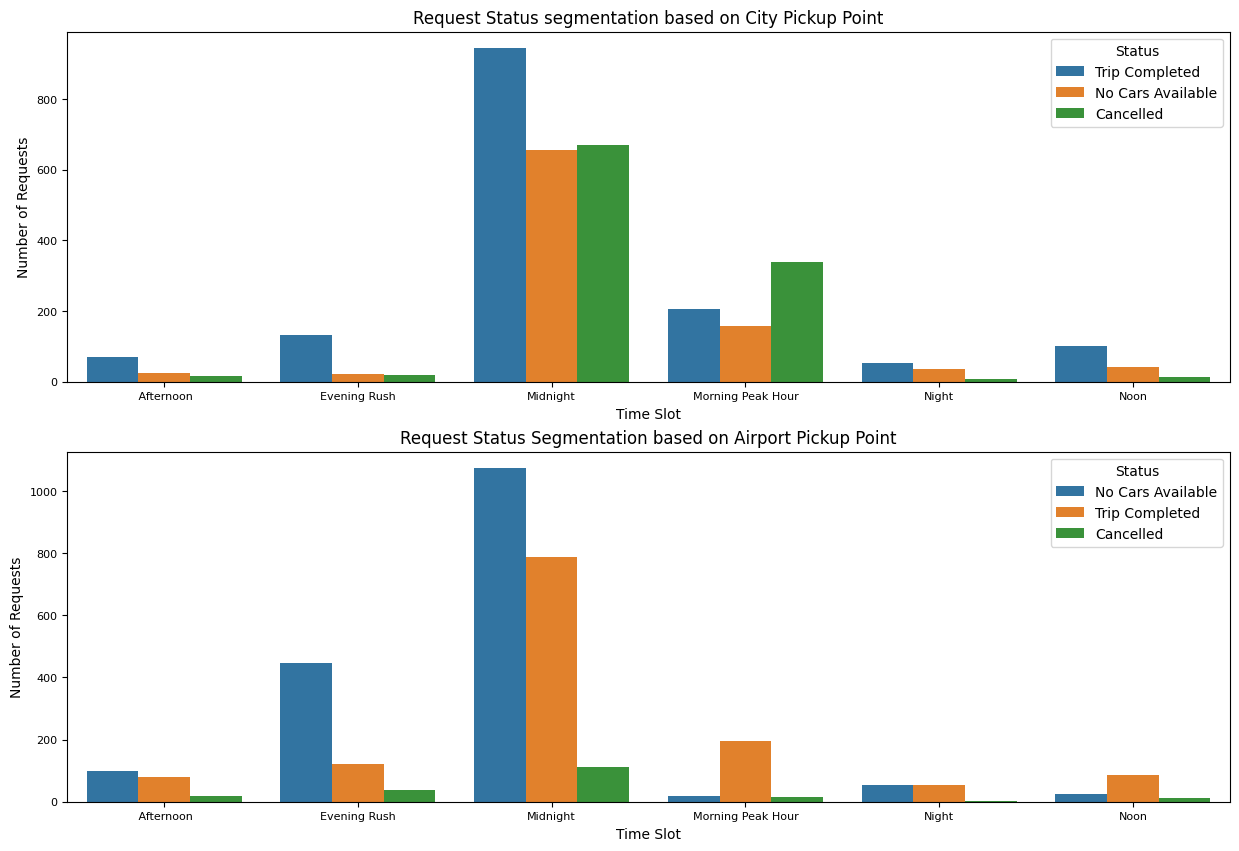

In [29]:
plt.figure(figsize=(15, 10))
plt.subplot(2,1,1)
g = sns.barplot(data = uber_status_by_time_slot_city, x = 'Time Slot', y = 'Number of Requests', hue = 'Status')
g.set_title('Request Status segmentation based on City Pickup Point')
g.tick_params(labelsize = 8)

plt.subplot(2,1,2)
ay = sns.barplot(data=uber_status_by_time_slot_airport,x='Time Slot',y='Number of Requests',hue='Status')
ay.set_title('Request Status Segmentation based on Airport Pickup Point')
ay.tick_params(labelsize = 8)
plt.show()

In [30]:
# Gap between Supply and Demand
hourly_status = pd.DataFrame(uber.groupby(['Request Hour', 'Status']).size()).reset_index().rename(columns={0:'Number of Requests'})
hourly_status

,Request Hour,Status,Number of Requests
0,0.0,Cancelled,1
1,0.0,No Cars Available,18
2,0.0,Trip Completed,13
3,1.0,Cancelled,3
4,1.0,No Cars Available,17
...,...,...,...
67,22.0,No Cars Available,42
68,22.0,Trip Completed,60
69,23.0,Cancelled,3
70,23.0,No Cars Available,30


In [31]:
hourly_status_transpose = pd.pivot_table(data = hourly_status, index = 'Request Hour', columns = 'Status', values = 'Number of Requests').reset_index().rename_axis(None, axis=1)
hourly_status_transpose

,Request Hour,Cancelled,No Cars Available,Trip Completed
0,0.0,1.0,18.0,13.0
1,1.0,3.0,17.0,8.0
2,2.0,2.0,21.0,7.0
3,3.0,1.0,18.0,12.0
4,4.0,14.0,31.0,37.0
5,5.0,66.0,30.0,75.0
6,6.0,64.0,35.0,72.0
7,7.0,64.0,16.0,70.0
8,8.0,64.0,37.0,58.0
9,9.0,65.0,40.0,85.0


In [32]:
hourly_status_transpose['Demand'] = hourly_status_transpose.sum(axis = 1)
hourly_status_transpose['Supply'] = hourly_status_transpose['Trip Completed']
hourly_status_transpose['Gap'] = hourly_status_transpose['Demand'] - hourly_status_transpose['Supply']
hourly_status_transpose

,Request Hour,Cancelled,No Cars Available,Trip Completed,Demand,Supply,Gap
0,0.0,1.0,18.0,13.0,32.0,13.0,19.0
1,1.0,3.0,17.0,8.0,29.0,8.0,21.0
2,2.0,2.0,21.0,7.0,32.0,7.0,25.0
3,3.0,1.0,18.0,12.0,34.0,12.0,22.0
4,4.0,14.0,31.0,37.0,86.0,37.0,49.0
5,5.0,66.0,30.0,75.0,176.0,75.0,101.0
6,6.0,64.0,35.0,72.0,177.0,72.0,105.0
7,7.0,64.0,16.0,70.0,157.0,70.0,87.0
8,8.0,64.0,37.0,58.0,167.0,58.0,109.0
9,9.0,65.0,40.0,85.0,199.0,85.0,114.0


In [33]:
hourly_total_metric = pd.melt(hourly_status_transpose.loc[:,['Request Hour', 'Demand','Gap', 'Supply']], id_vars=['Request Hour'], var_name = 'Request Metric', value_name = 'Number of Requests').sort_values('Request Hour')
hourly_total_metric

,Request Hour,Request Metric,Number of Requests
0,0.0,Demand,32.0
24,0.0,Gap,19.0
48,0.0,Supply,13.0
25,1.0,Gap,21.0
49,1.0,Supply,8.0
...,...,...,...
46,22.0,Gap,69.0
70,22.0,Supply,60.0
23,23.0,Demand,90.0
47,23.0,Gap,56.0


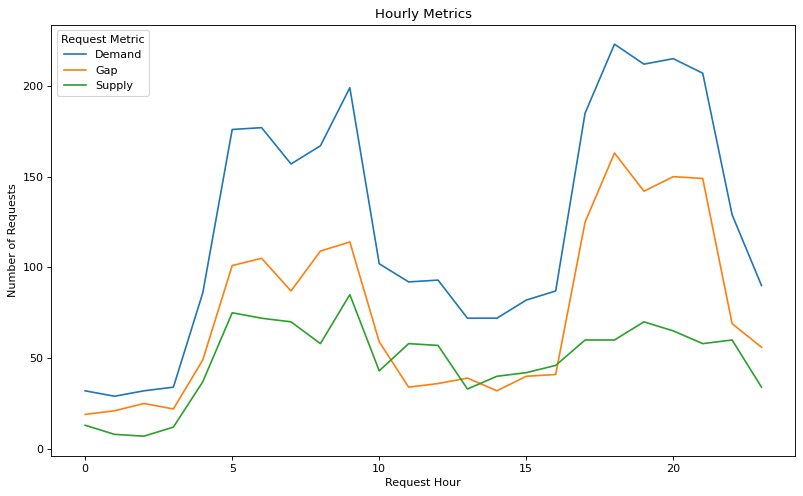

In [34]:
plt.figure(figsize=(12,7),dpi=80)
h = sns.lineplot(data = hourly_total_metric, x = 'Request Hour', y = 'Number of Requests', hue = 'Request Metric', markers= True)
h.set_title('Hourly Metrics')
plt.show()

In [37]:
uber_status_timeslot_transpose = pd.pivot_table(data=status_by_time,columns='Status',values='Number of Requests',index='Time Slot')
uber_status_timeslot_transpose = uber_status_timeslot_transpose.reset_index().rename_axis(None,axis=1)

uber_status_timeslot_transpose['Demand'] = (
    uber_status_timeslot_transpose[['Trip Completed', 'Cancelled', 'No Cars Available']]
    .sum(axis=1)
)

uber_status_timeslot_transpose['Supply'] = uber_status_timeslot_transpose['Trip Completed']
uber_status_timeslot_transpose['Gap'] = uber_status_timeslot_transpose['Demand'] - uber_status_timeslot_transpose['Supply']

In [38]:
uber_status_timeslot_transpose

,Time Slot,Cancelled,No Cars Available,Trip Completed,Demand,Supply,Gap
0,Afternoon,35.0,123.0,148.0,306.0,148.0,158.0
1,Evening Rush,57.0,469.0,253.0,779.0,253.0,526.0
2,Midnight,782.0,1728.0,1732.0,4242.0,1732.0,2510.0
3,Morning Peak Hour,355.0,175.0,403.0,933.0,403.0,530.0
4,Night,9.0,90.0,107.0,206.0,107.0,99.0
5,Noon,26.0,65.0,188.0,279.0,188.0,91.0


In [39]:
uber_status_timeslot_transpose.loc[:, ['Time Slot', 'Demand', 'Supply', 'Gap']]

,Time Slot,Demand,Supply,Gap
0,Afternoon,306.0,148.0,158.0
1,Evening Rush,779.0,253.0,526.0
2,Midnight,4242.0,1732.0,2510.0
3,Morning Peak Hour,933.0,403.0,530.0
4,Night,206.0,107.0,99.0
5,Noon,279.0,188.0,91.0


In [41]:
timeslot_metric = pd.melt(uber_status_timeslot_transpose.loc[:,['Time Slot', 'Demand', 'Supply', 'Gap']], id_vars=['Time Slot'], var_name = "Request Metric", value_name = "Number of Requests")
timeslot_metric = timeslot_metric.sort_values(['Time Slot', 'Request Metric'])
timeslot_metric

,Time Slot,Request Metric,Number of Requests
0,Afternoon,Demand,306.0
12,Afternoon,Gap,158.0
6,Afternoon,Supply,148.0
1,Evening Rush,Demand,779.0
13,Evening Rush,Gap,526.0
7,Evening Rush,Supply,253.0
2,Midnight,Demand,4242.0
14,Midnight,Gap,2510.0
8,Midnight,Supply,1732.0
3,Morning Peak Hour,Demand,933.0


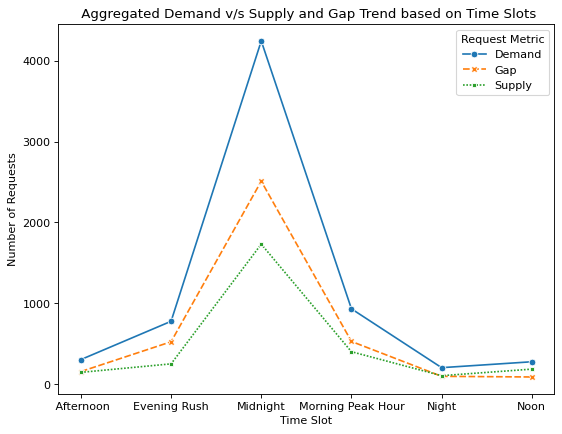

In [43]:
plt.figure(figsize=(8,6),dpi=80)
ax = sns.lineplot(data=timeslot_metric ,x='Time Slot',y='Number of Requests',hue='Request Metric',style='Request Metric',markers=True)
ax.set_title(' Aggregated Demand v/s Supply and Gap Trend based on Time Slots',fontsize=12)
plt.show()